In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

import warnings

warnings.filterwarnings('ignore')

In [63]:
df=pd.read_csv('E:\Rajalakshmi\PROJECT\online fraud payment.csv')

In [64]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [66]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [67]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0,0


In [68]:
df.shape

(1048575, 11)

In [69]:
df.drop_duplicates()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


In [70]:
df.shape

(1048575, 11)

In [71]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
X=df.drop('isFraud',axis=1).copy()
Y=df['isFraud'].copy()

In [12]:
X

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0


In [13]:
Y

0          0
1          0
2          1
3          1
4          0
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: isFraud, Length: 1048575, dtype: int64

In [15]:
from sklearn.preprocessing import OrdinalEncoder
ordinal=  OrdinalEncoder()
X_ordinal_encode=ordinal.fit_transform(X)
X_ordinal_encode

array([[0.00000e+00, 3.00000e+00, 1.99846e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 3.00000e+00, 4.11060e+04, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 4.00000e+00, 3.97700e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [9.40000e+01, 3.00000e+00, 2.60805e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [9.40000e+01, 3.00000e+00, 2.02722e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [9.40000e+01, 3.00000e+00, 2.25081e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [16]:
X_ordinal_encode_columns=ordinal.get_feature_names_out()
X_ordinal_encode_columns

array(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'isFlaggedFraud'], dtype=object)

In [17]:
X_ordinal_encode=pd.DataFrame(X_ordinal_encode)
X_ordinal_encode

,0,1,2,3,4,5,6,7,8,9
0,0.0,3.0,199846.0,125164.0,177408.0,196785.0,274917.0,0.0,0.0,0.0
1,0.0,3.0,41106.0,361319.0,40939.0,58600.0,286716.0,0.0,0.0,0.0
2,0.0,4.0,3977.0,165236.0,437.0,0.0,73550.0,0.0,0.0,0.0
3,0.0,1.0,3977.0,961662.0,437.0,0.0,65464.0,18649.0,0.0,0.0
4,0.0,3.0,228189.0,567915.0,71310.0,78965.0,138001.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1048570,94.0,1.0,606907.0,97392.0,256696.0,276005.0,67716.0,238741.0,206133.0,0.0
1048571,94.0,3.0,201066.0,517554.0,122928.0,138000.0,388387.0,0.0,0.0,0.0
1048572,94.0,3.0,260805.0,562208.0,39688.0,22135.0,160789.0,0.0,0.0,0.0
1048573,94.0,3.0,202722.0,343317.0,122996.0,137950.0,272152.0,0.0,0.0,0.0


In [18]:
X_ordinal_encode.columns=X_ordinal_encode_columns
X_ordinal_encode

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,0.0,3.0,199846.0,125164.0,177408.0,196785.0,274917.0,0.0,0.0,0.0
1,0.0,3.0,41106.0,361319.0,40939.0,58600.0,286716.0,0.0,0.0,0.0
2,0.0,4.0,3977.0,165236.0,437.0,0.0,73550.0,0.0,0.0,0.0
3,0.0,1.0,3977.0,961662.0,437.0,0.0,65464.0,18649.0,0.0,0.0
4,0.0,3.0,228189.0,567915.0,71310.0,78965.0,138001.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1048570,94.0,1.0,606907.0,97392.0,256696.0,276005.0,67716.0,238741.0,206133.0,0.0
1048571,94.0,3.0,201066.0,517554.0,122928.0,138000.0,388387.0,0.0,0.0,0.0
1048572,94.0,3.0,260805.0,562208.0,39688.0,22135.0,160789.0,0.0,0.0,0.0
1048573,94.0,3.0,202722.0,343317.0,122996.0,137950.0,272152.0,0.0,0.0,0.0


In [19]:
df1=X_ordinal_encode
df1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,0.0,3.0,199846.0,125164.0,177408.0,196785.0,274917.0,0.0,0.0,0.0
1,0.0,3.0,41106.0,361319.0,40939.0,58600.0,286716.0,0.0,0.0,0.0
2,0.0,4.0,3977.0,165236.0,437.0,0.0,73550.0,0.0,0.0,0.0
3,0.0,1.0,3977.0,961662.0,437.0,0.0,65464.0,18649.0,0.0,0.0
4,0.0,3.0,228189.0,567915.0,71310.0,78965.0,138001.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1048570,94.0,1.0,606907.0,97392.0,256696.0,276005.0,67716.0,238741.0,206133.0,0.0
1048571,94.0,3.0,201066.0,517554.0,122928.0,138000.0,388387.0,0.0,0.0,0.0
1048572,94.0,3.0,260805.0,562208.0,39688.0,22135.0,160789.0,0.0,0.0,0.0
1048573,94.0,3.0,202722.0,343317.0,122996.0,137950.0,272152.0,0.0,0.0,0.0


<Axes: >

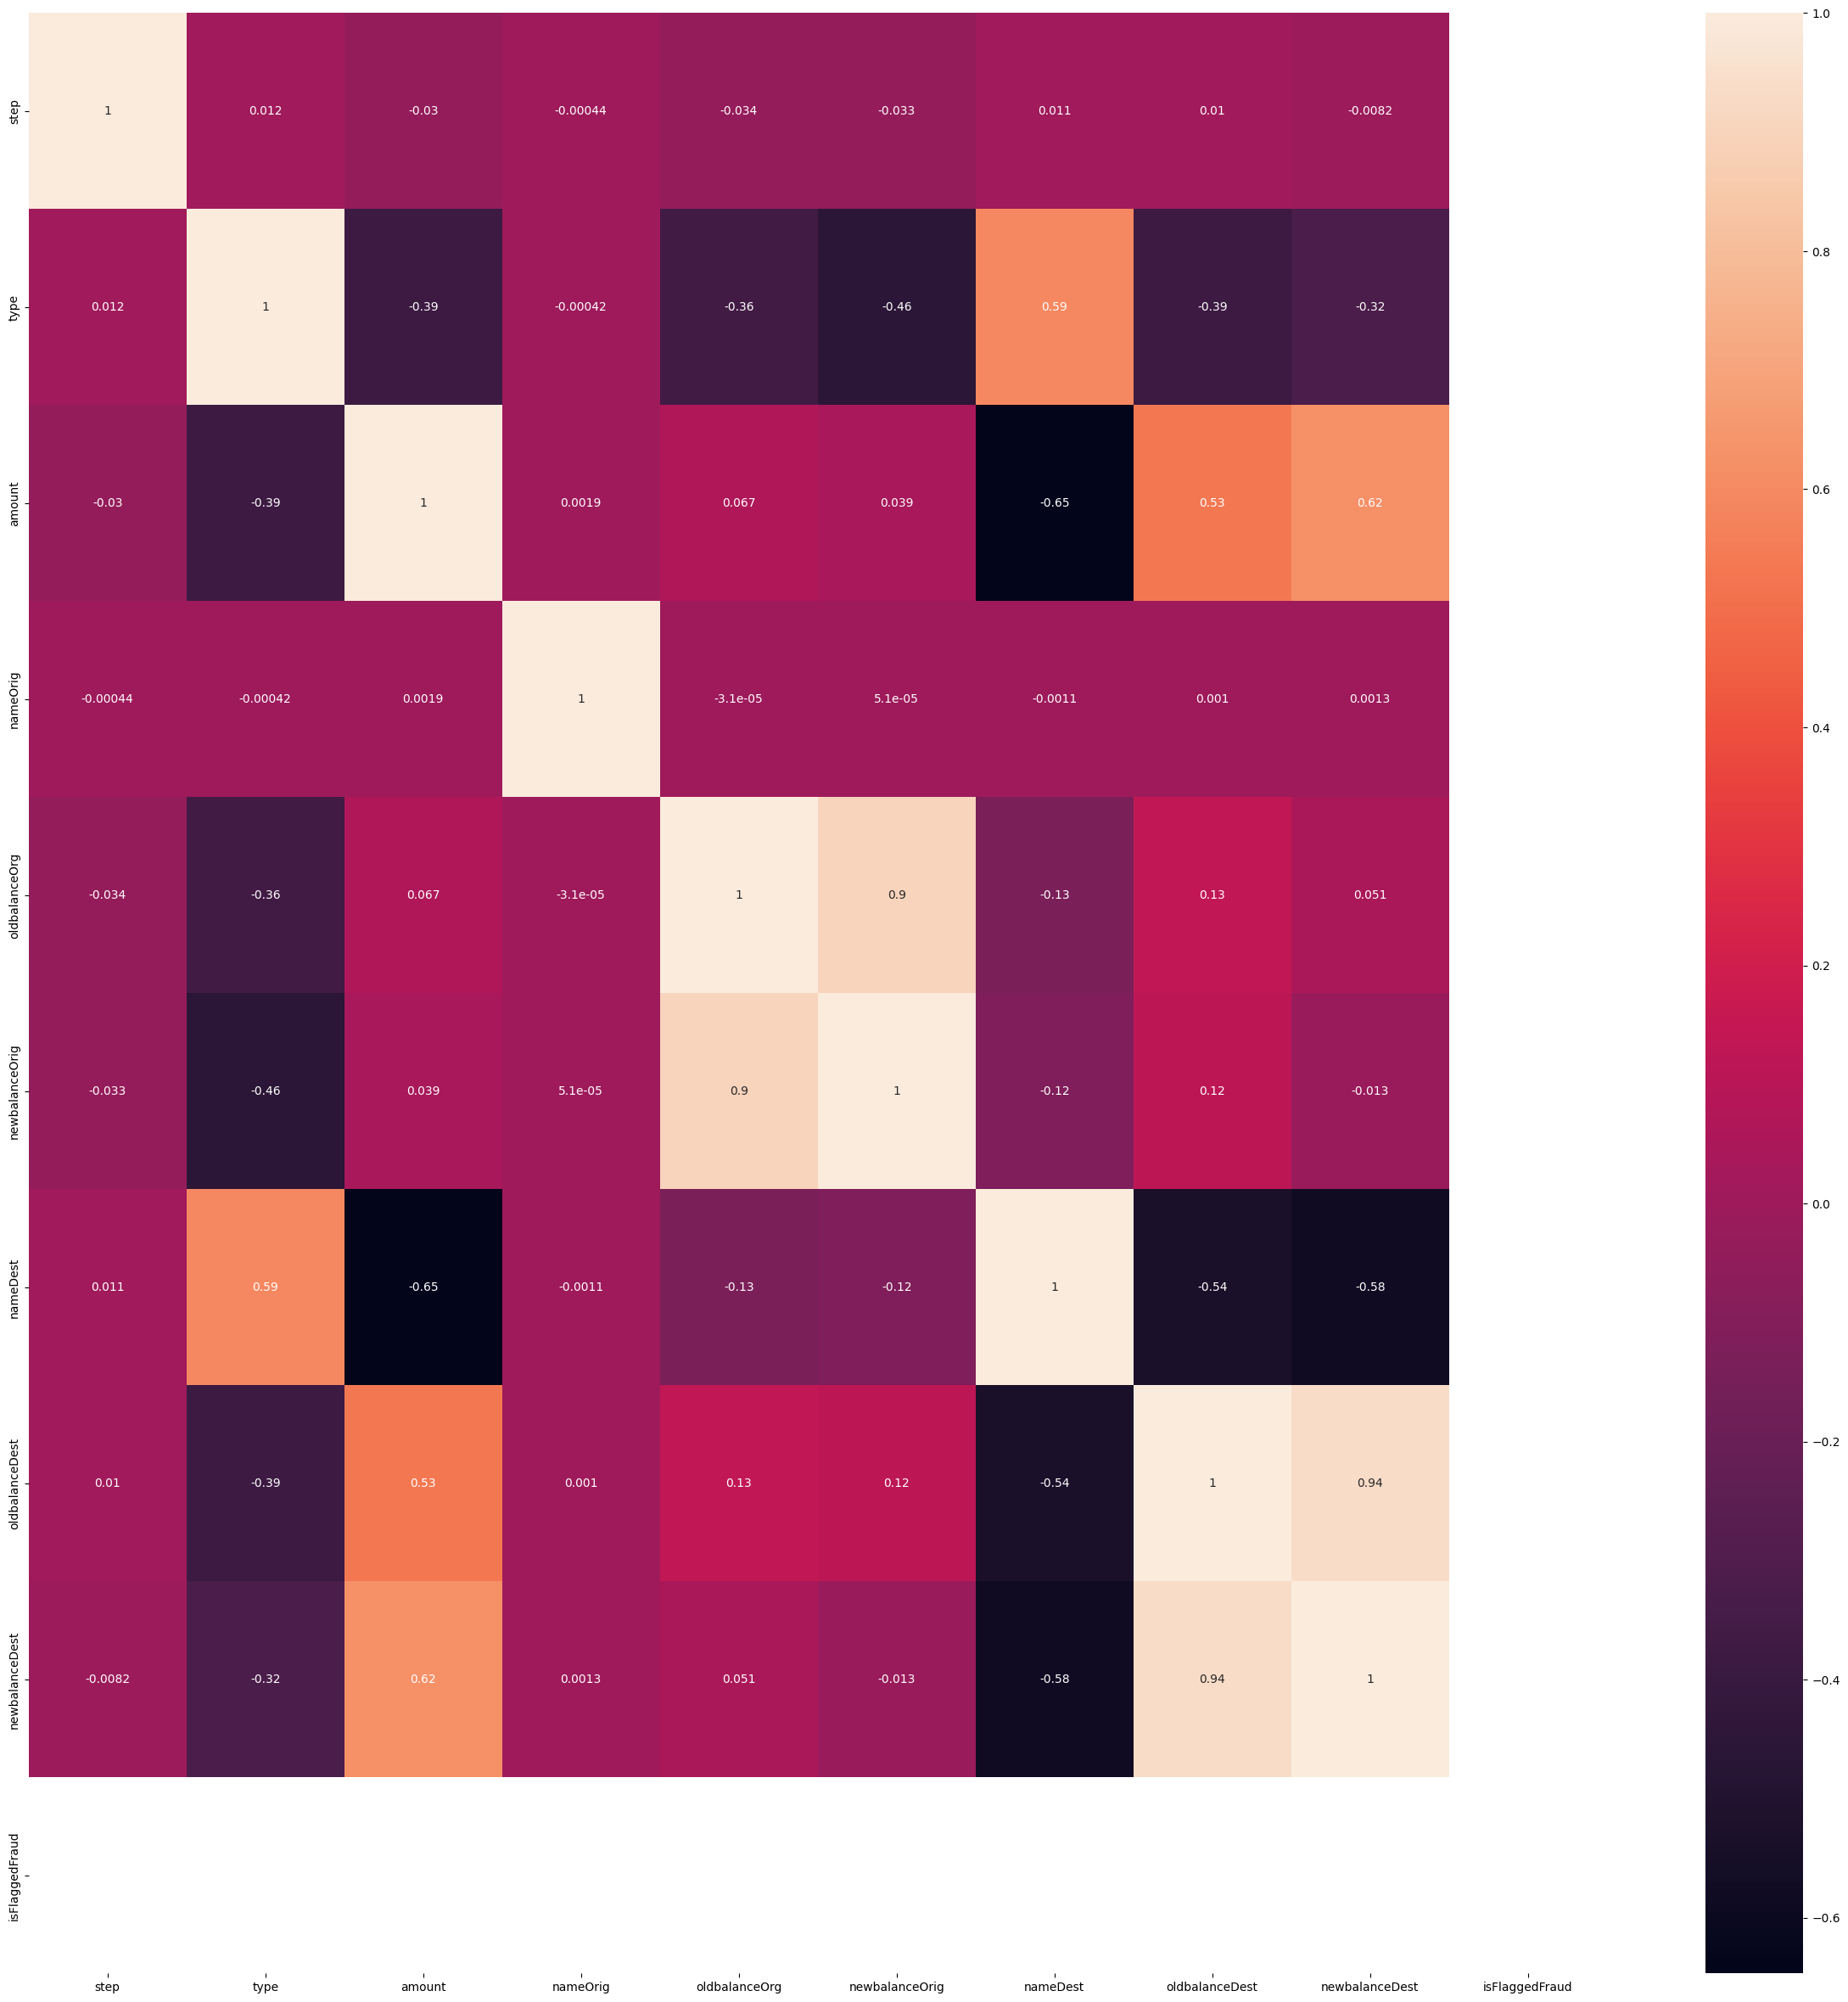

In [59]:
plt.figure(figsize=(30,30))
sns.heatmap(df1.corr(),annot=True)

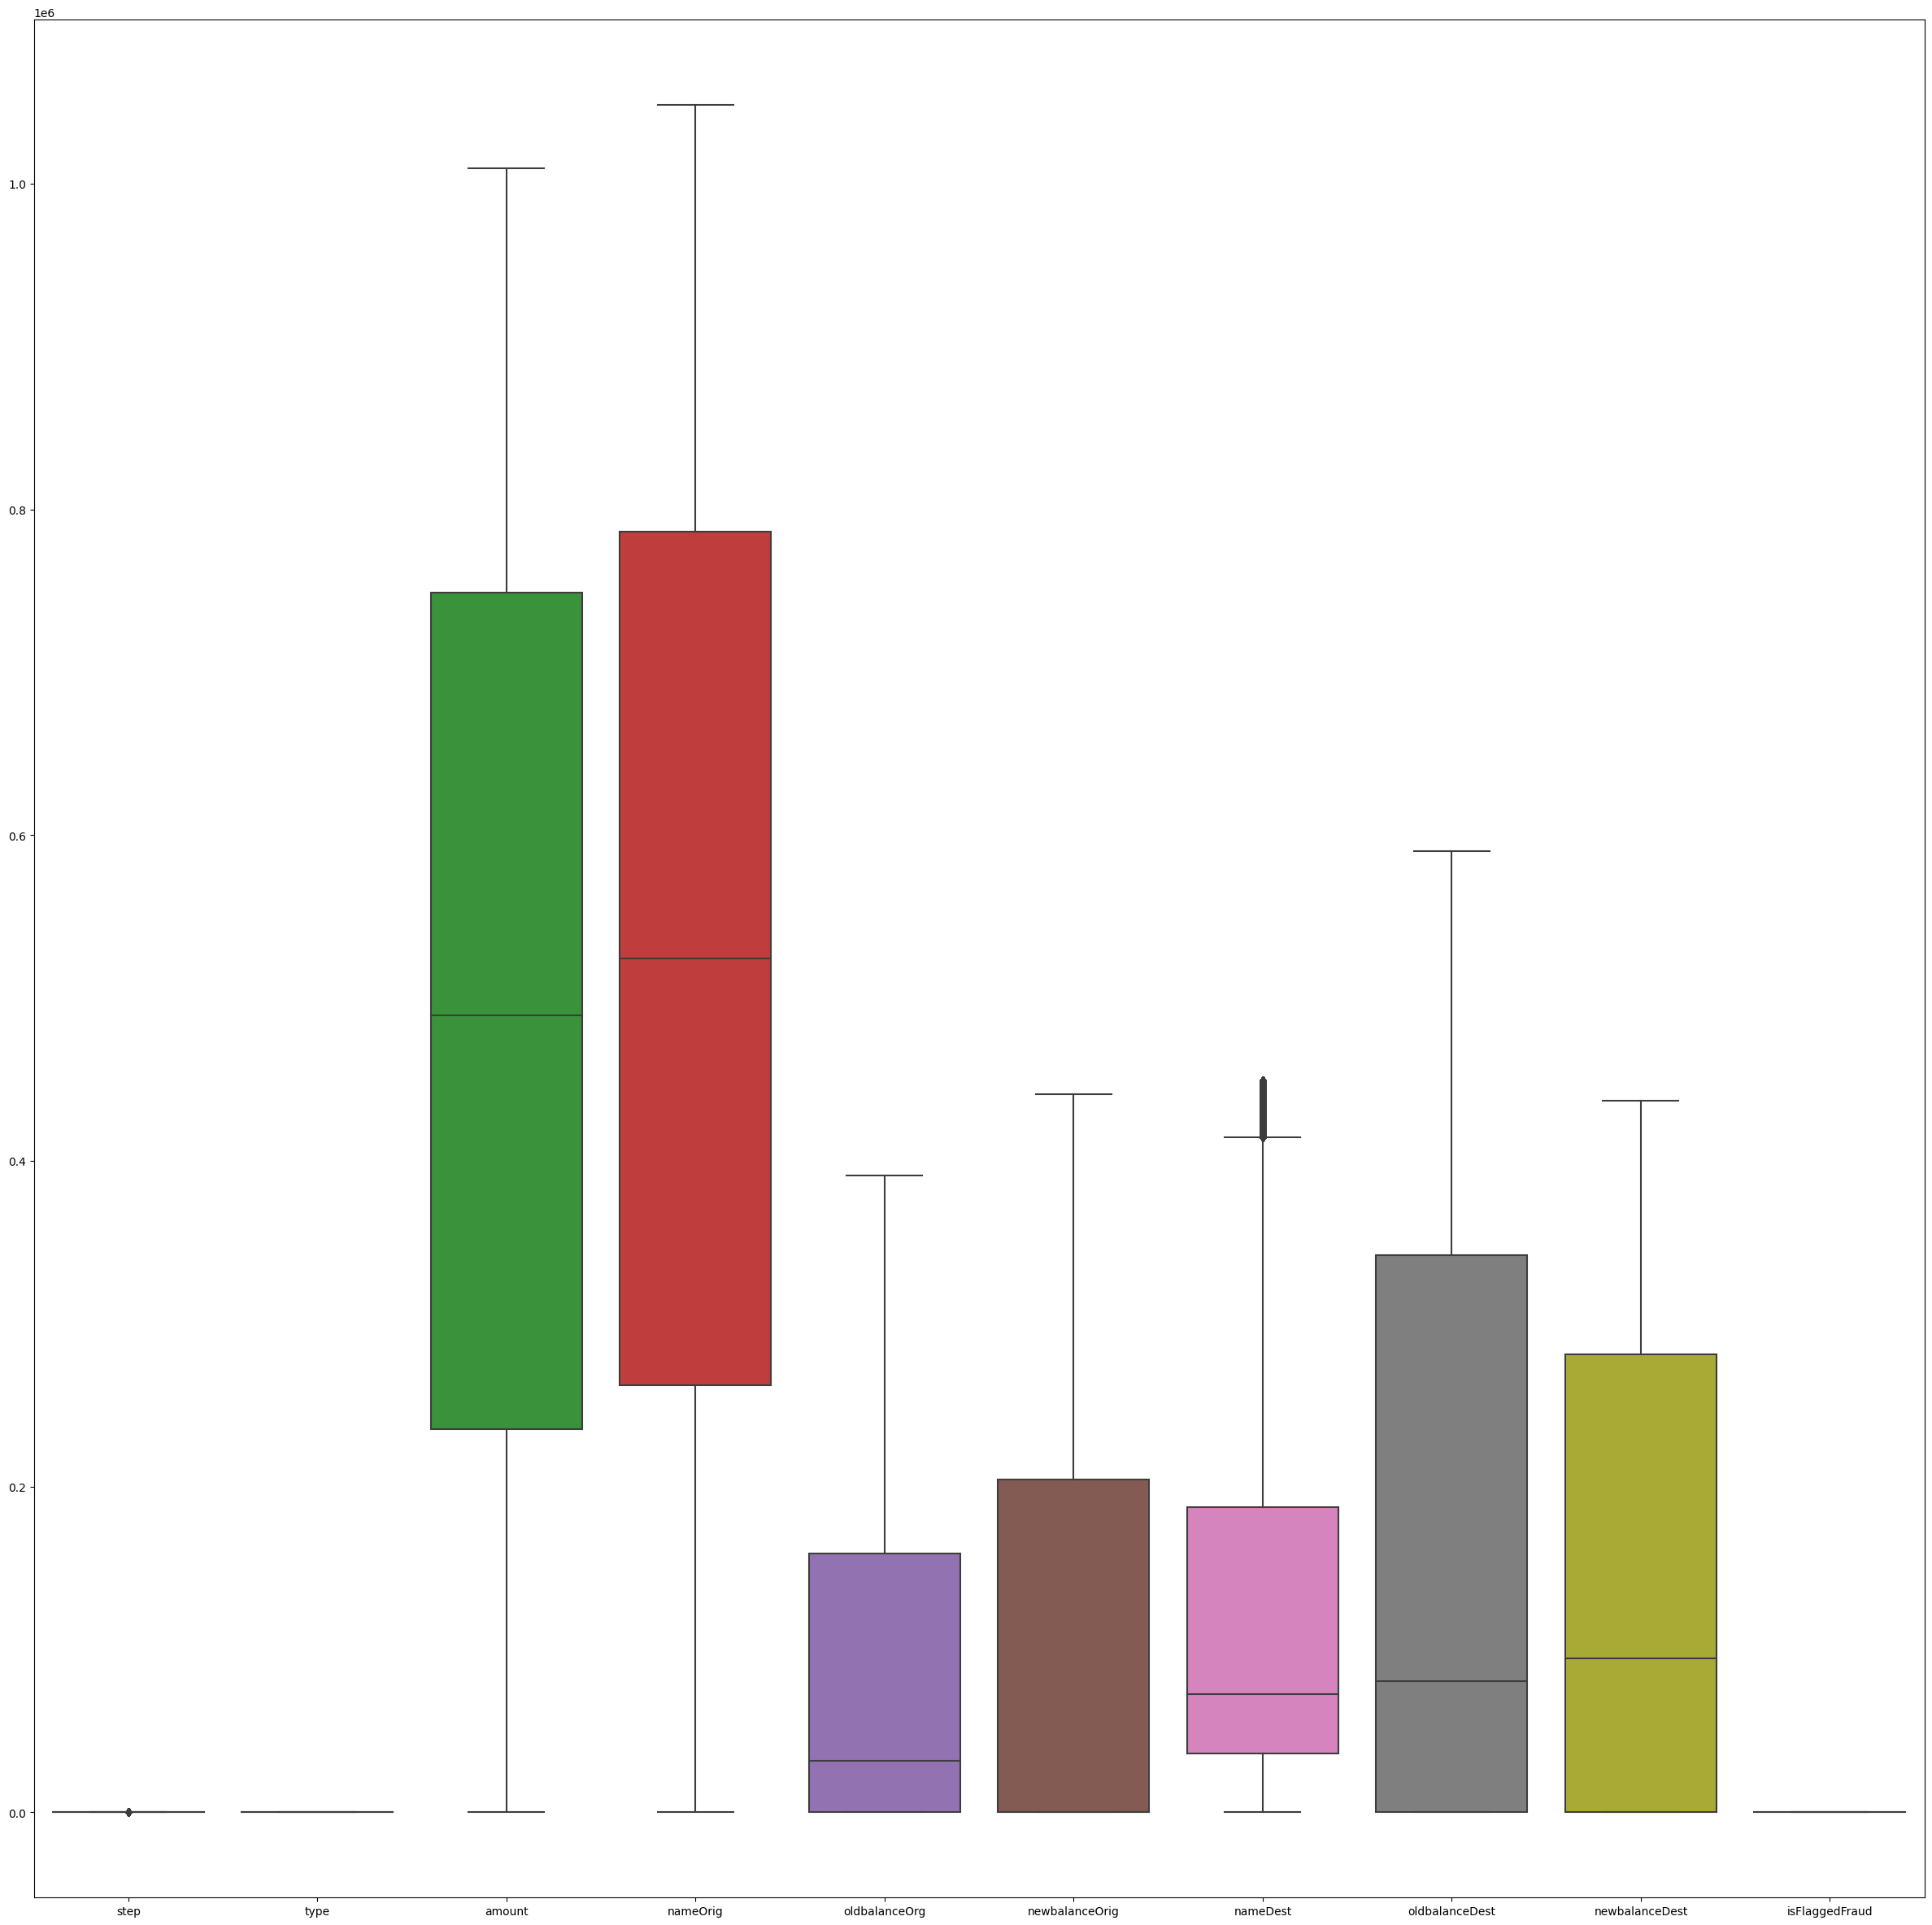

In [20]:
plt.figure(figsize=(30,30))
sns.boxplot(df1)
plt.show()

In [41]:
# IQR

df1['step'].median()

19.0

In [42]:
q1=df1['step'].quantile(0.25)
q1

14.0

In [43]:
q3=df1['step'].quantile(0.75)
q3

38.0

In [44]:
IQR=q3-q1

In [45]:
IQR

24.0

In [46]:
lower_range= q1-(1.5*IQR)

In [47]:
lower_range

-22.0

In [48]:
upper_range = q3 + (1.5*IQR)
upper_range 

74.0

In [49]:
#capping
df1['step']=np.where(df1['step']<lower_range,lower_range,
                np.where(df1['step']>upper_range,upper_range,
                         df1['step']))
df1['step']

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
           ... 
1048570    74.0
1048571    74.0
1048572    74.0
1048573    74.0
1048574    74.0
Name: step, Length: 1048575, dtype: float64

<Axes: >

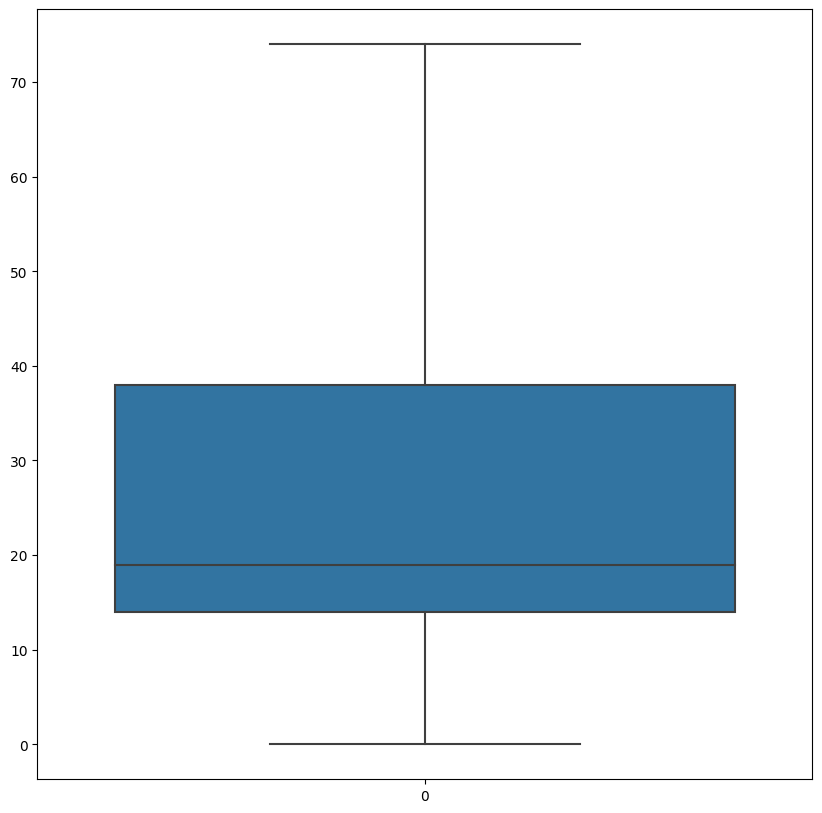

In [58]:
plt.figure(figsize=(10,10))
sns.boxplot(df1['step'])

<Axes: >

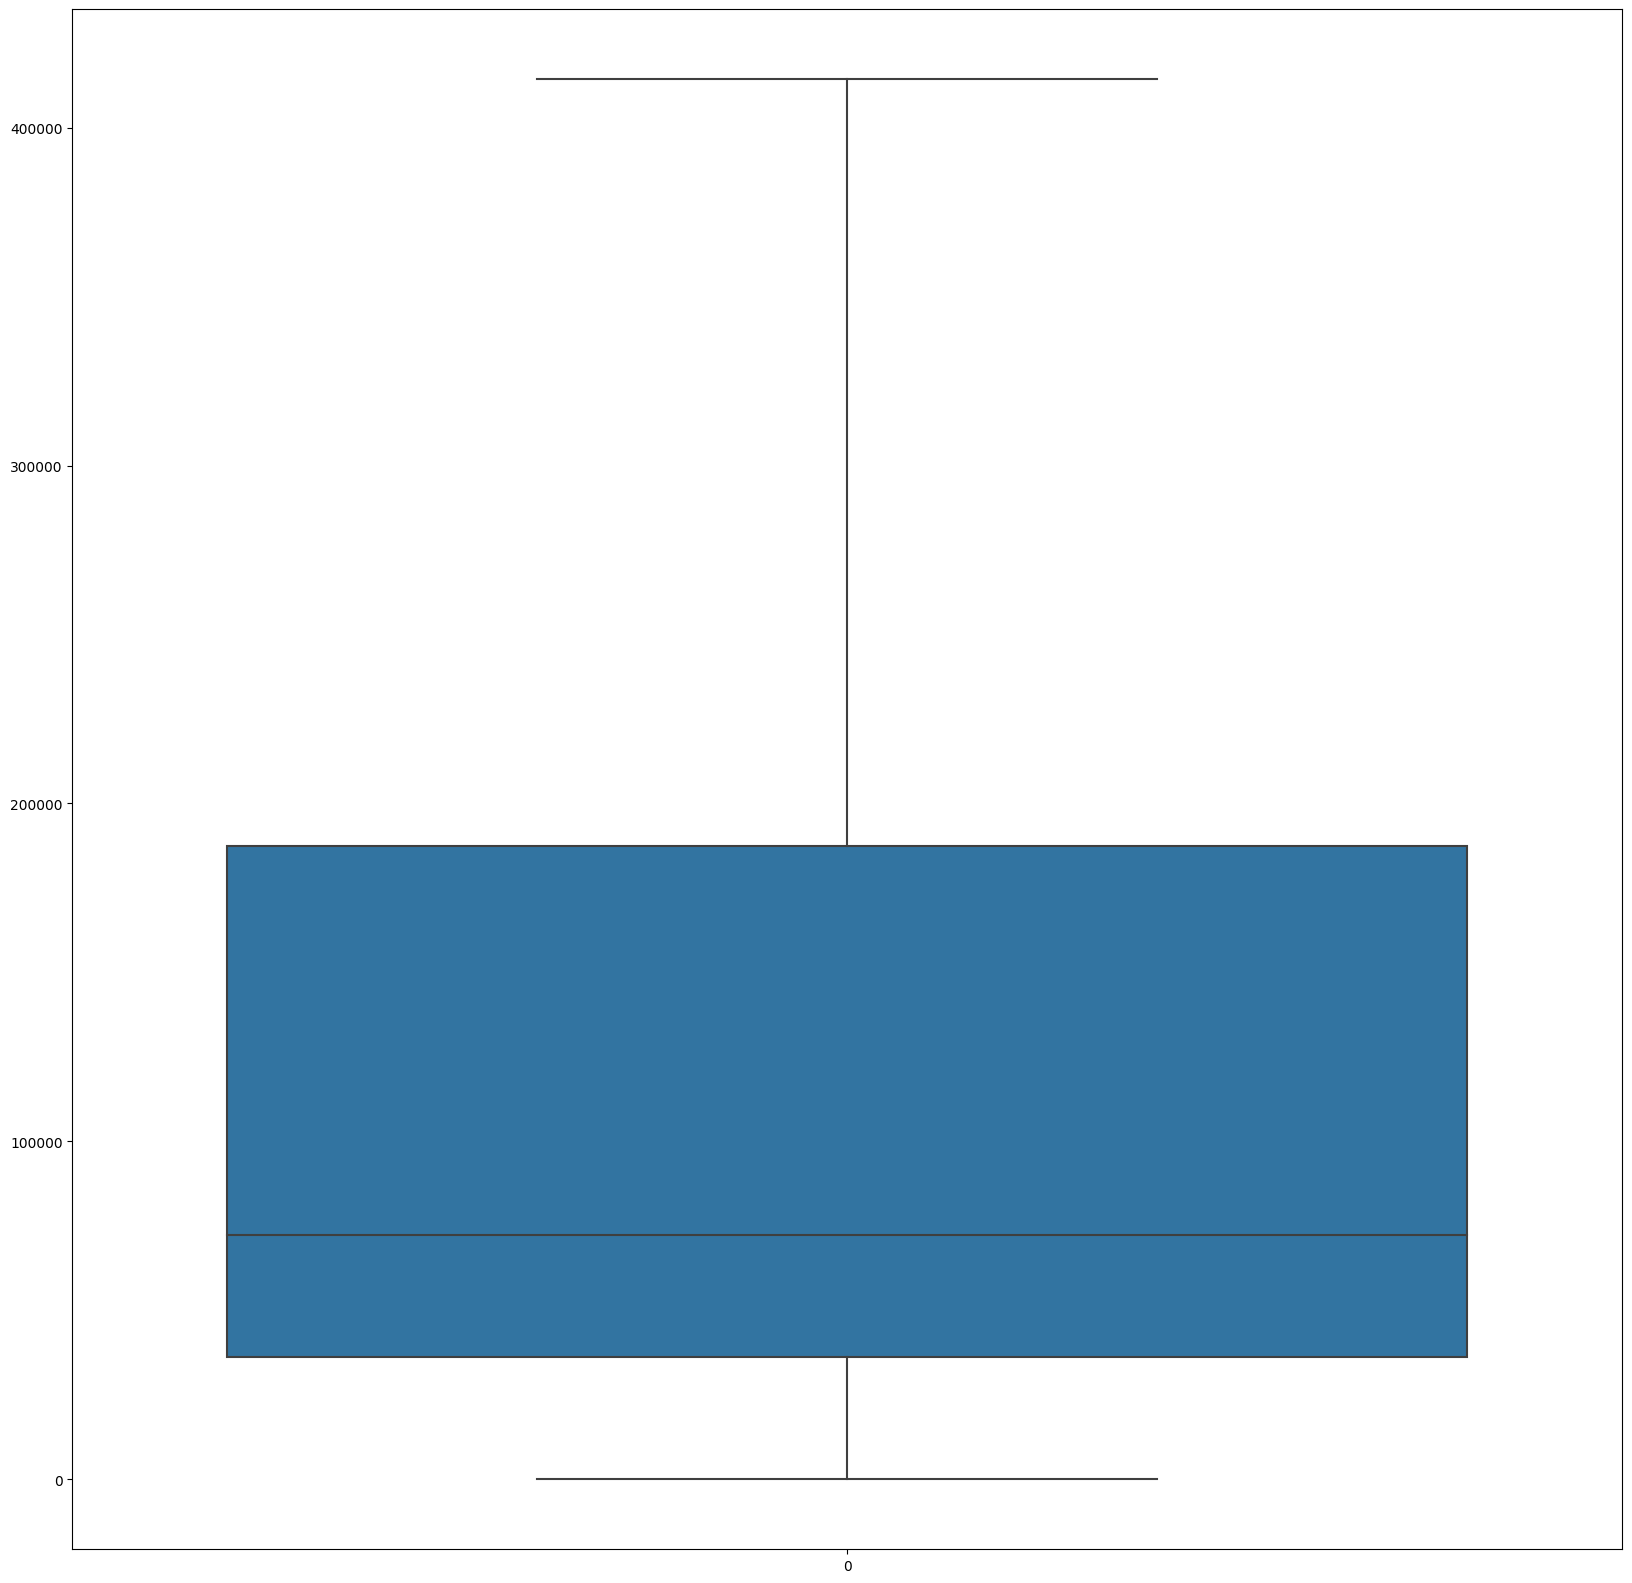

In [30]:
plt.figure(figsize=(20,20))
sns.boxplot(df1['nameDest'])

In [51]:
X=df1

<Axes: >

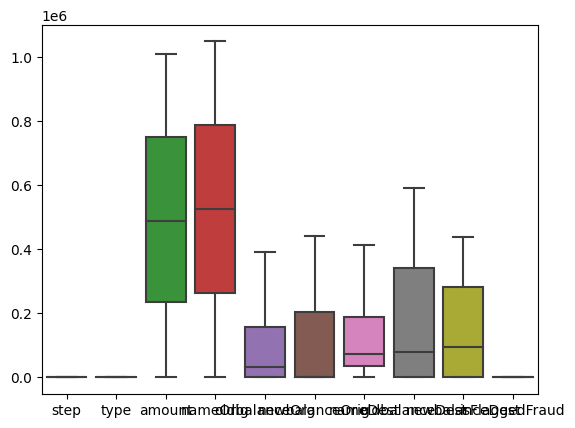

In [52]:
sns.boxplot(X)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [54]:
# Step 1: Split the scaled data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Step 2: Initialize the SVM classifier
svm = SVC()
# Step 3: Train the SVM classifier using the training data
svm.fit(X_train, Y_train)

SVC()

In [55]:
SVC()

SVC()

In [56]:
# Step 4: Make predictions on the testing set
Y_pred = svm.predict(X_test)
# Step 5: Evaluate the performance of the SVM classifier
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9991607658012064
Precision: 0.9285714285714286
Recall: 0.23214285714285715
F1-score: 0.3714285714285714
